# Affine transforms using cupy
Here we compare performance of affine transforms implemented in [cupy](https://cupy.dev), [scipy](https://scipy.org) and clEsperanto

**Note:** benchmarking results vary heavily depending on image size, kernel size, used operations, parameters and used hardware. Use this notebook to adapt it to your use-case scenario and benchmark on your target hardware. If you have different scenarios or use-cases, you are very welcome to submit your notebook as pull-request!

In [ ]:
from skimage.io import imread, imshow

import cupy
from cupyx.scipy import ndimage as ndi

(192, 256, 256)

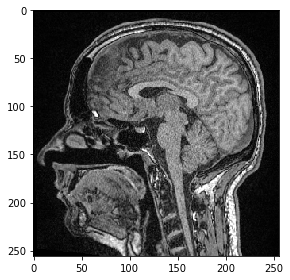

In [3]:
image = imread('../../data/Haase_MRT_tfl3d1.tif')

imshow(image[100])
image.shape

In [4]:
import numpy as np

# scaling by factor 1 / s
s = 0.5
matrix = np.asarray([
    [s, 0, 0, 0],
    [0, s, 0, 0],
    [0, 0, s, 0],
    [0, 0, 0, 1],
])
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
print(output_shape)


(384, 512, 512)


## cupy

cupy affine transform duration: 2.615372896194458
cupy affine transform duration: 0.46410441398620605
cupy affine transform duration: 0.463104248046875
cupy affine transform duration: 0.4631040096282959
cupy affine transform duration: 0.4631037712097168
cupy affine transform duration: 0.463104248046875
cupy affine transform duration: 0.4631040096282959
cupy affine transform duration: 0.4631049633026123
cupy affine transform duration: 0.46410489082336426
cupy affine transform duration: 0.4631030559539795


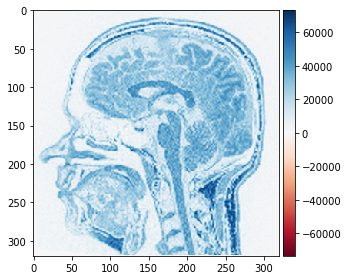

In [5]:

cuda_image = cupy.asarray(image)

cuda_scaled = cupy.ndarray(output_shape)
ndi.affine_transform(cuda_image, cupy.asarray(matrix), output=cuda_scaled, output_shape=output_shape)
          
result = cupy.asnumpy(cuda_scaled)
imshow(result[200])